#  1. Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2. Load and Prepare Data

In [2]:
# Load data
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# Add labels: 1 for Real, 0 for Fake
true_df['label'] = 1
fake_df['label'] = 0

# Combine the datasets
data = pd.concat([true_df, fake_df], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle

# Use only 'text' and 'label'
data = data[['text', 'label']]

# Check for missing values
print(data.isnull().sum())
data.head()

text     0
label    0
dtype: int64


,text,label
0,WASHINGTON (Reuters) - Democratic presidential...,1
1,(This November 9th story has been refiled to ...,1
2,"On Monday, Donald Trump once again embarrassed...",0
3,Nothing captures the sheer absurdity of the Re...,0
4,People have all kinds of ways of supporting th...,0


# 3. Text Preprocessing Function

In [3]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                               # Lowercase
    text = re.sub(r'\d+', '', text)                   # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]        # Remove stopwords
    return " ".join(words)

# Apply cleaning
data['clean_text'] = data['text'].apply(clean_text)
data.head()


,text,label,clean_text
0,WASHINGTON (Reuters) - Democratic presidential...,1,washington reuters democratic presidential can...
1,(This November 9th story has been refiled to ...,1,november th story refiled clarify keyes commen...
2,"On Monday, Donald Trump once again embarrassed...",0,monday donald trump embarrassed country accide...
3,Nothing captures the sheer absurdity of the Re...,0,nothing captures sheer absurdity republican pr...
4,People have all kinds of ways of supporting th...,0,people kinds ways supporting favorite candidat...


#  4. TF-IDF Vectorization

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_text'], data['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.7)  # Ignore very common words

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#  5. Model Training (PassiveAggressiveClassifier)

In [6]:
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)


# 6. Evaluation Metrics

Accuracy: 0.9952

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4677
           1       0.99      1.00      1.00      4303

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



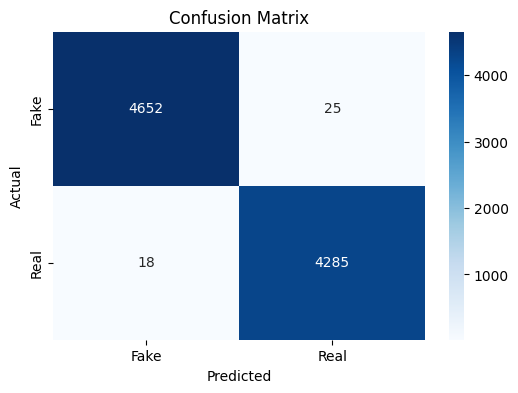

In [7]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Save model and vectorizer
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
